# Temperature Forecast Project using ML
Project Description This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


# Importing Libraries

In [57]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

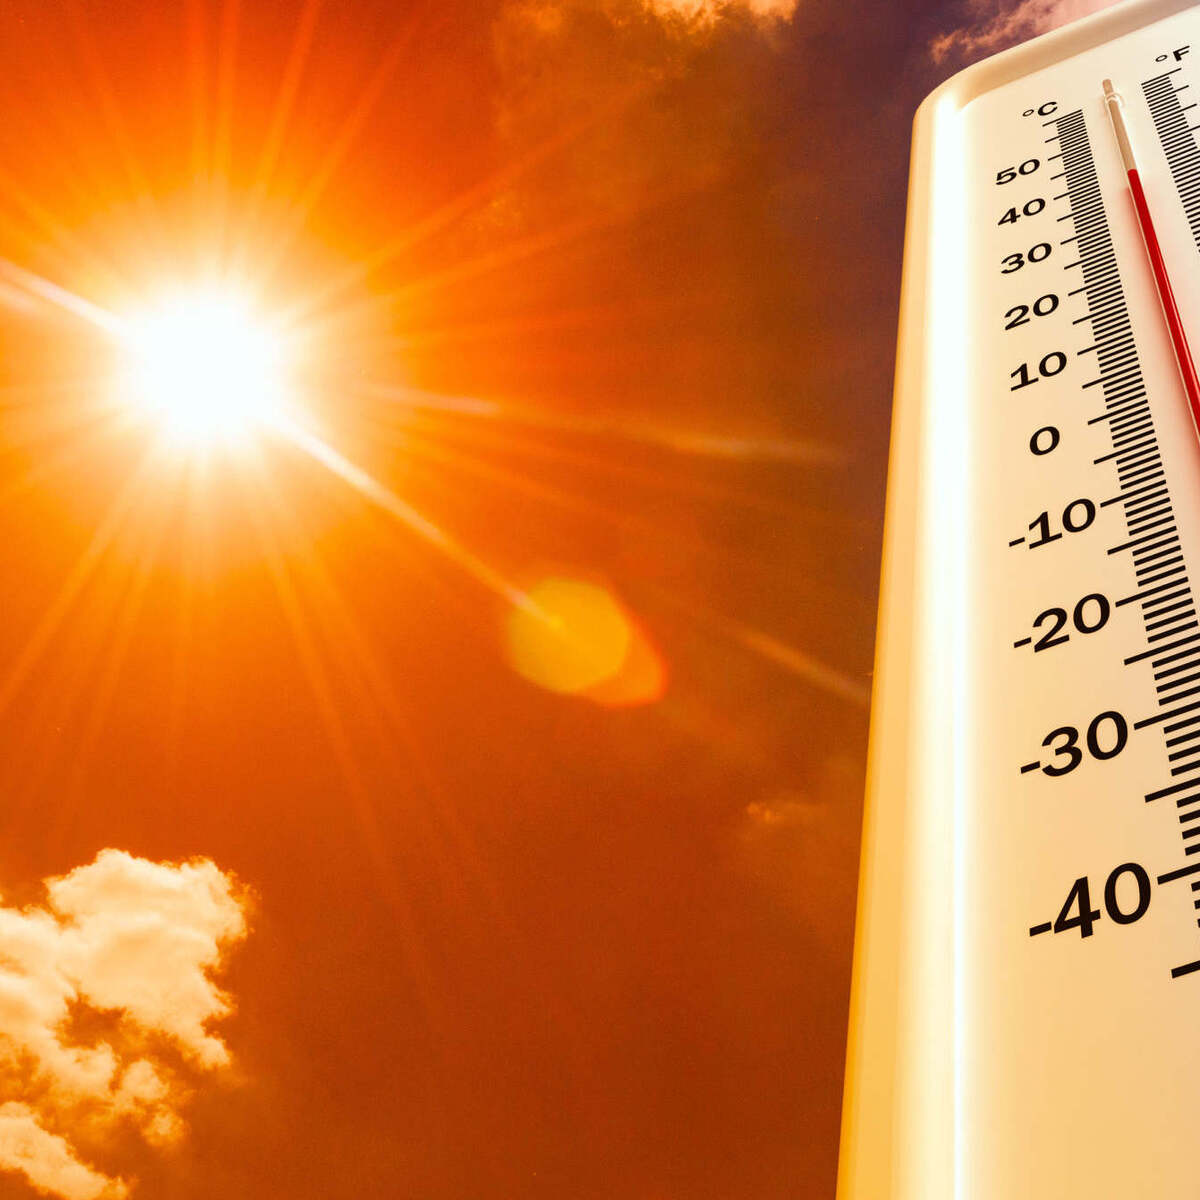

In [58]:
df=pd.read_csv("Temperature_forecast.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [59]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [60]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [61]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Here we can observe their are null values present in dataset

<Axes: >

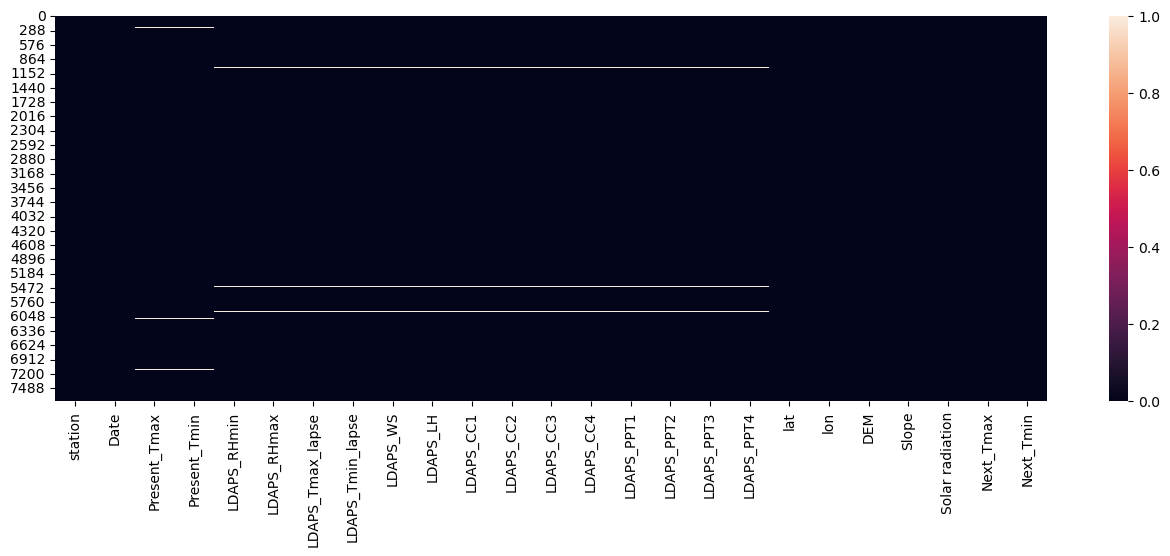

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(df.isnull()) #Looking for null values if any, in heatmap

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Here only 1 object is present apart all are numerical columns

In [64]:
df=df.dropna()

In [65]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Here all the null values are removed

<Axes: >

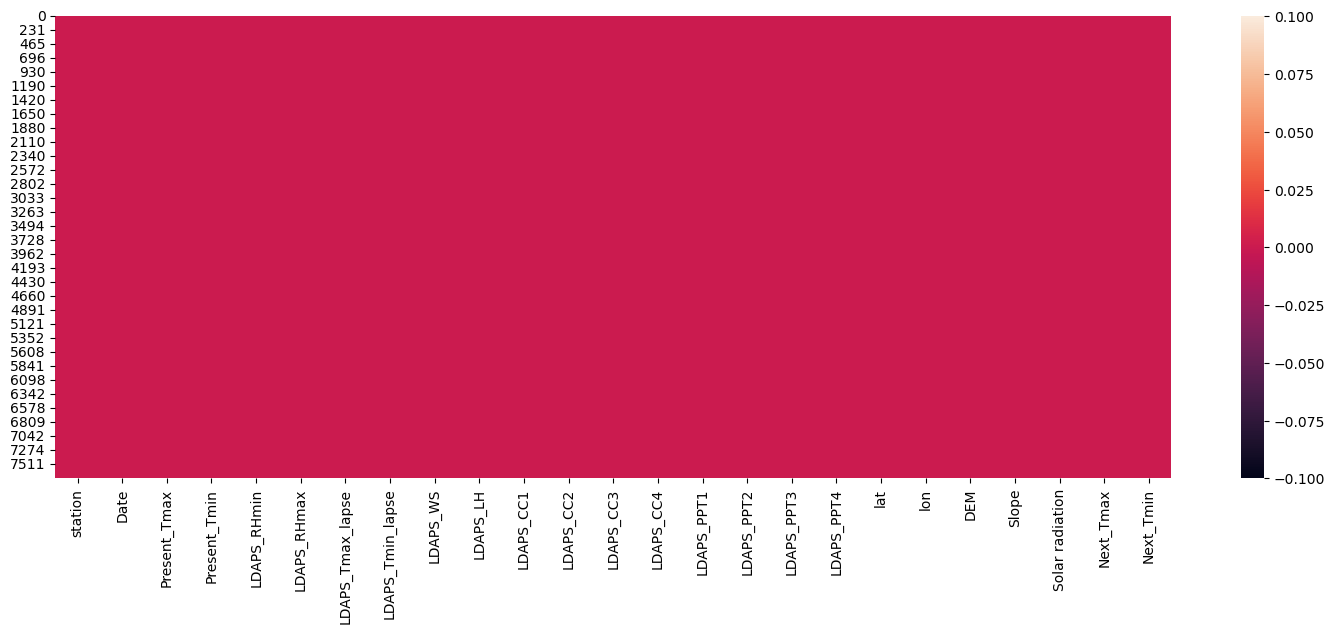

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,6))
sns.heatmap(df.isnull())

Here there is no null values

# Statistical Summary

In [67]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

# Exporatory Data Analysis(EDA)

In [68]:
dfcor=df.corr()

<Axes: >

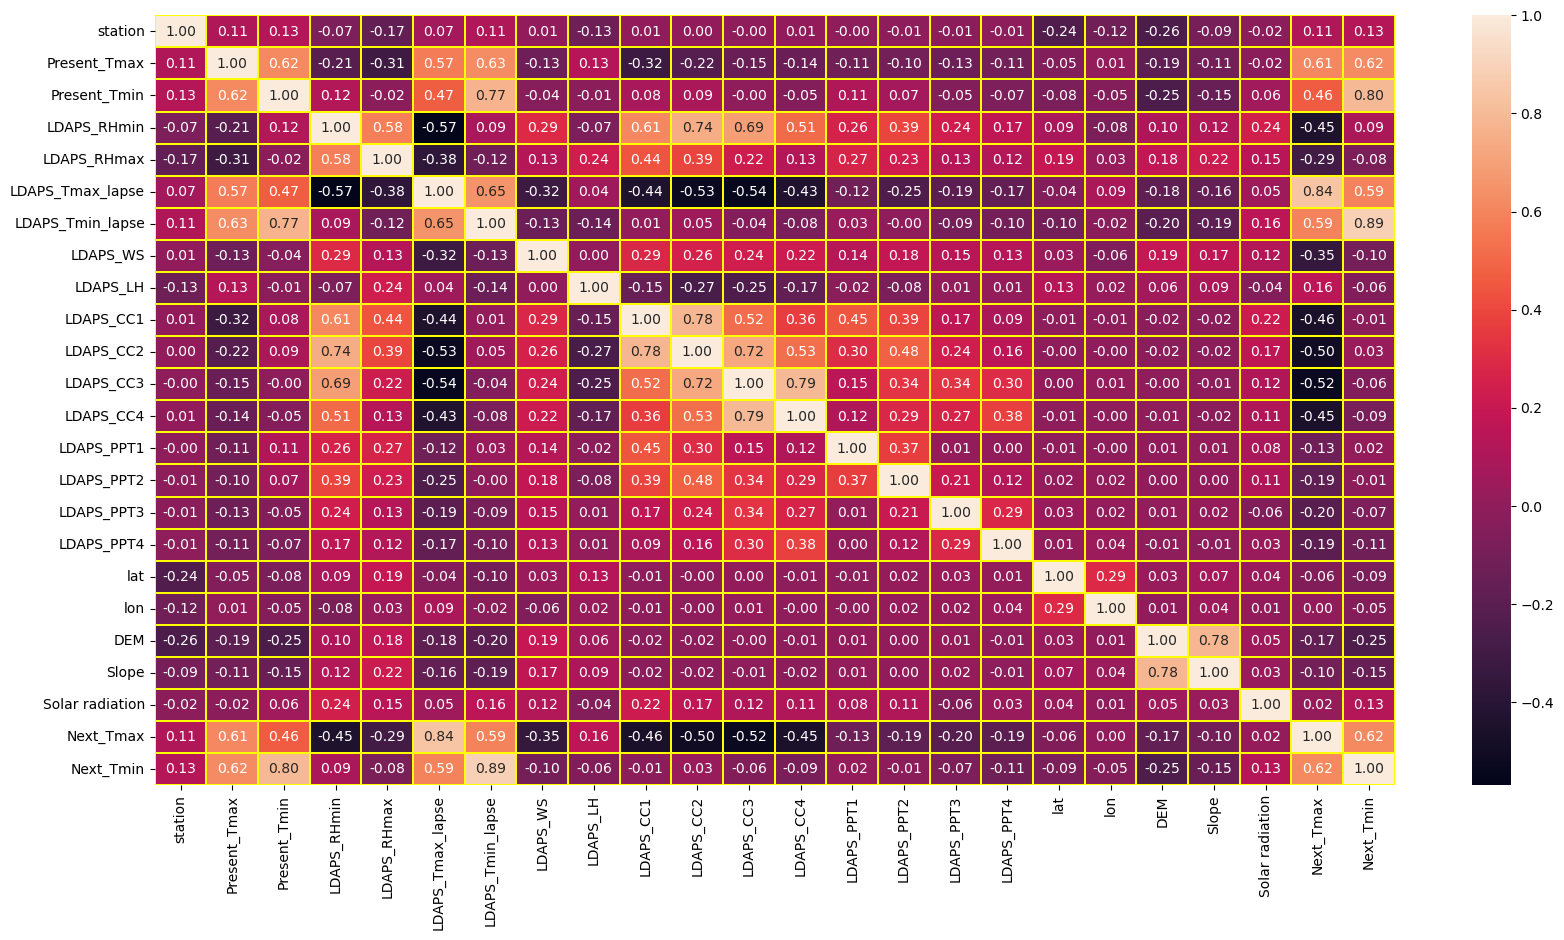

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='yellow',fmt='0.2f')

We can see here Present_Tmax and Present_Tmin are highly correlated with Target variables, LDAPS_RHmin and LDAPS_RHmax are also highly correlated with target variables, Next_Tmin and Next_Tmax are also highly correlated with exch other, most of the columns are negatively correlated with target variables.

In [70]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

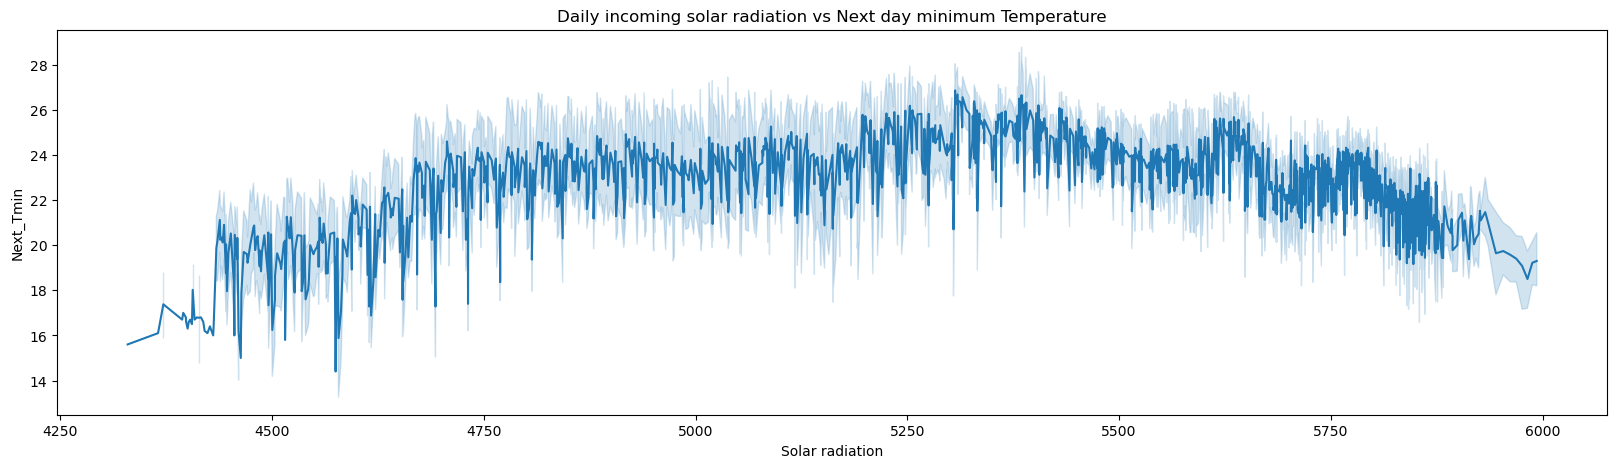

In [71]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

here, we can see that, the next day minimum temparature is frequently increases.

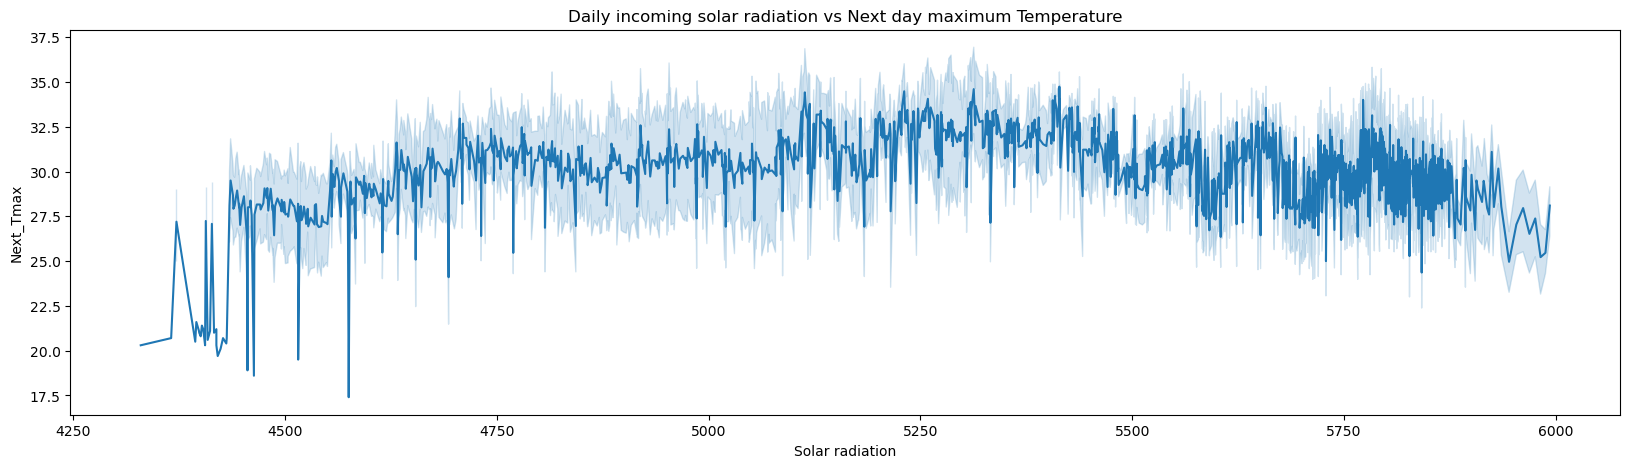

In [72]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

here, we can see that, the next day maximum temparature is frequently increases.

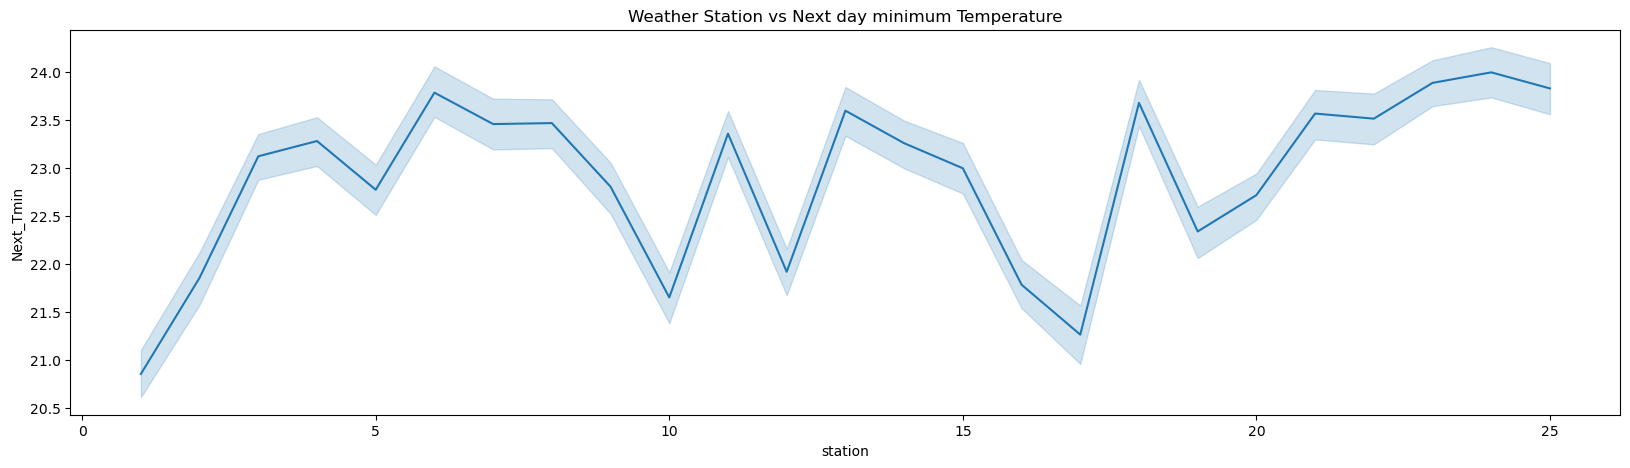

In [73]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

here, we can see that,the line plot clears that next day minimum temparature is high & low at station 18 & 17 respectively.

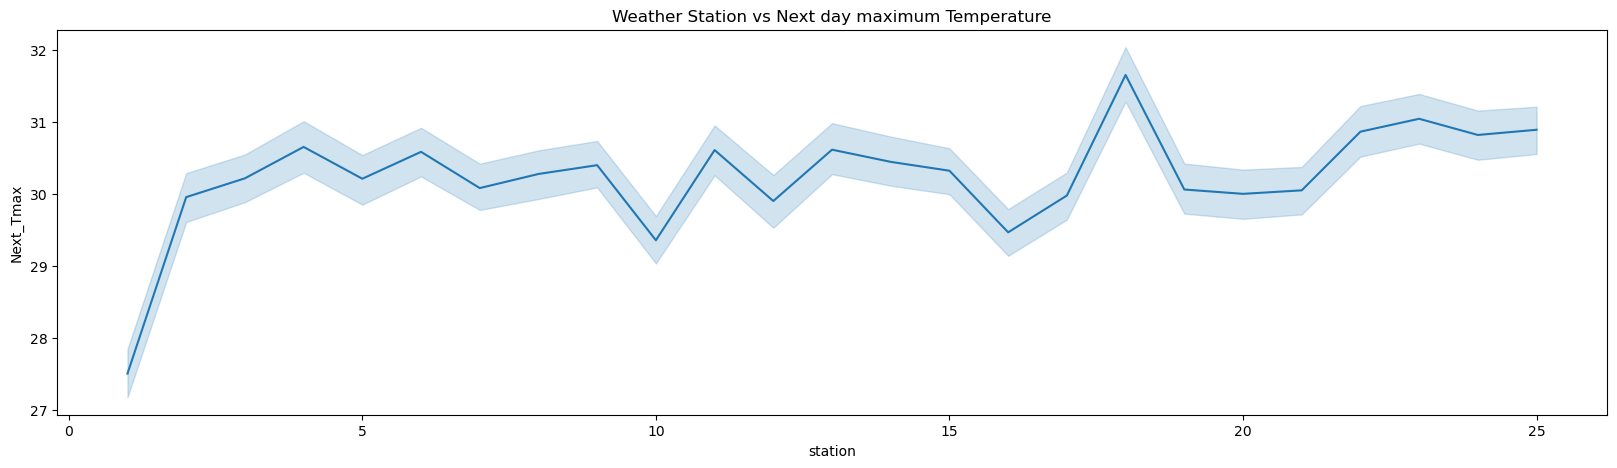

In [74]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

here, we can see that,the line plot clears that next day maximum temparature is high & low at station 18 & 10 respectively.

<Axes: title={'center': 'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

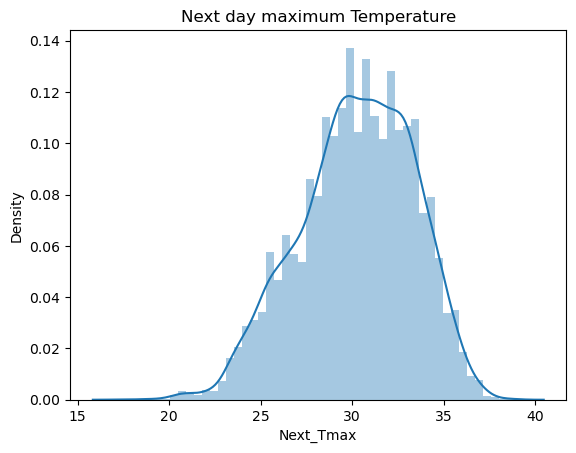

In [75]:
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

The distplot clears that next day maximum temparature distribution is lies between 22 to 37.

<Axes: title={'center': 'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

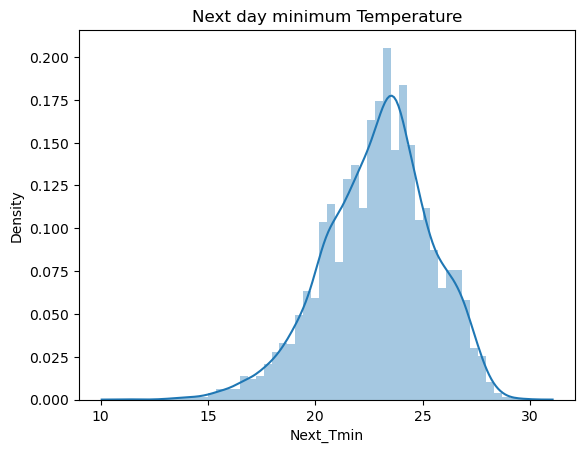

In [76]:
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)


as we can see that,the distplot clears that next day minimum temparature distribution is lies between 15 to 28.

In [77]:
import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)

In [78]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [79]:
df.head()

station    Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  735049          28.7          21.4    58.255688    91.116364   
1      2.0  735049          31.9          21.6    52.263397    90.604721   
2      3.0  735049          31.6          23.3    48.690479    83.973587   
3      4.0  735049          32.0          23.4    58.239788    96.483688   
4      5.0  735049          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

# Lable Encoder

In [80]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [81]:
df.head()

station    Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  735049          28.7          21.4    58.255688    91.116364   
1      2.0  735049          31.9          21.6    52.263397    90.604721   
2      3.0  735049          31.6          23.3    48.690479    83.973587   
3      4.0  735049          32.0          23.4    58.239788    96.483688   
4      5.0  735049          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

# Handling Outliers

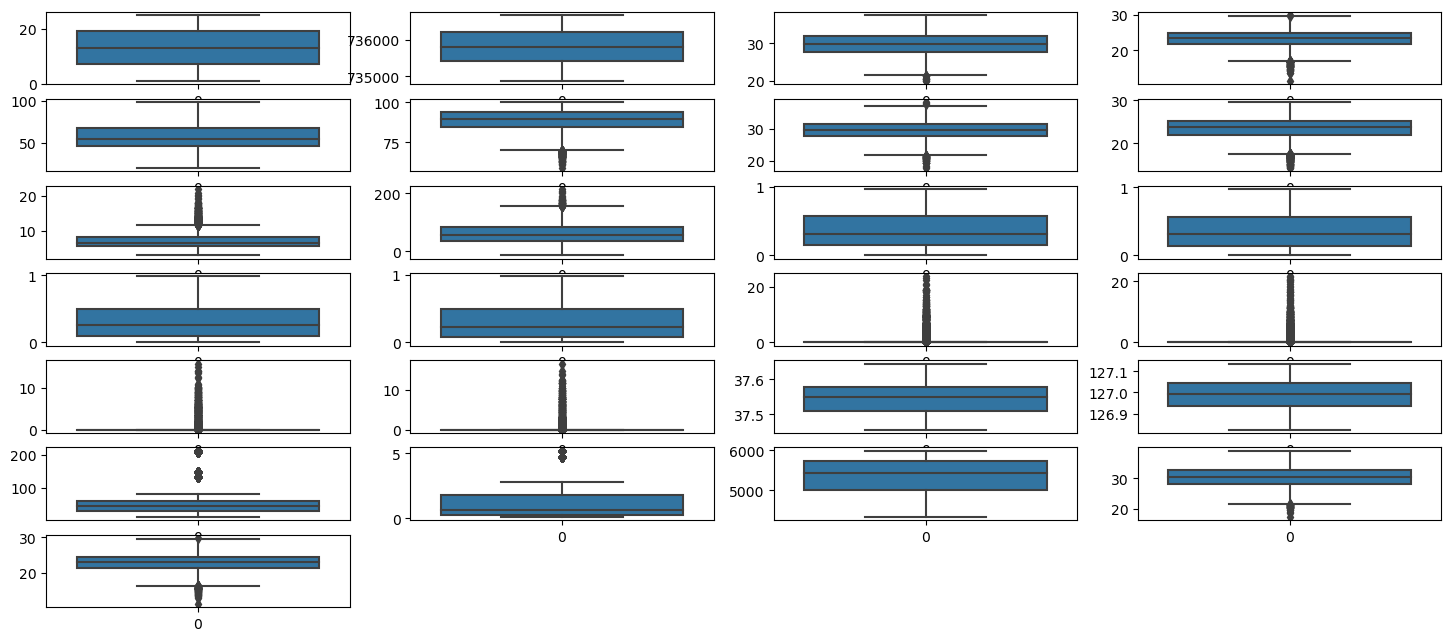

In [82]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

# Removing Outliers

# By Using Zscore

In [83]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))


In [84]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (7588, 25)
After removing outliers:: (6739, 25)


# InterQuartileRange

In [85]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

37.2645068965

In [86]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2095, 25)


Choosing ZSCORE because there is huge dataloss in IQR

# Handling Skewness

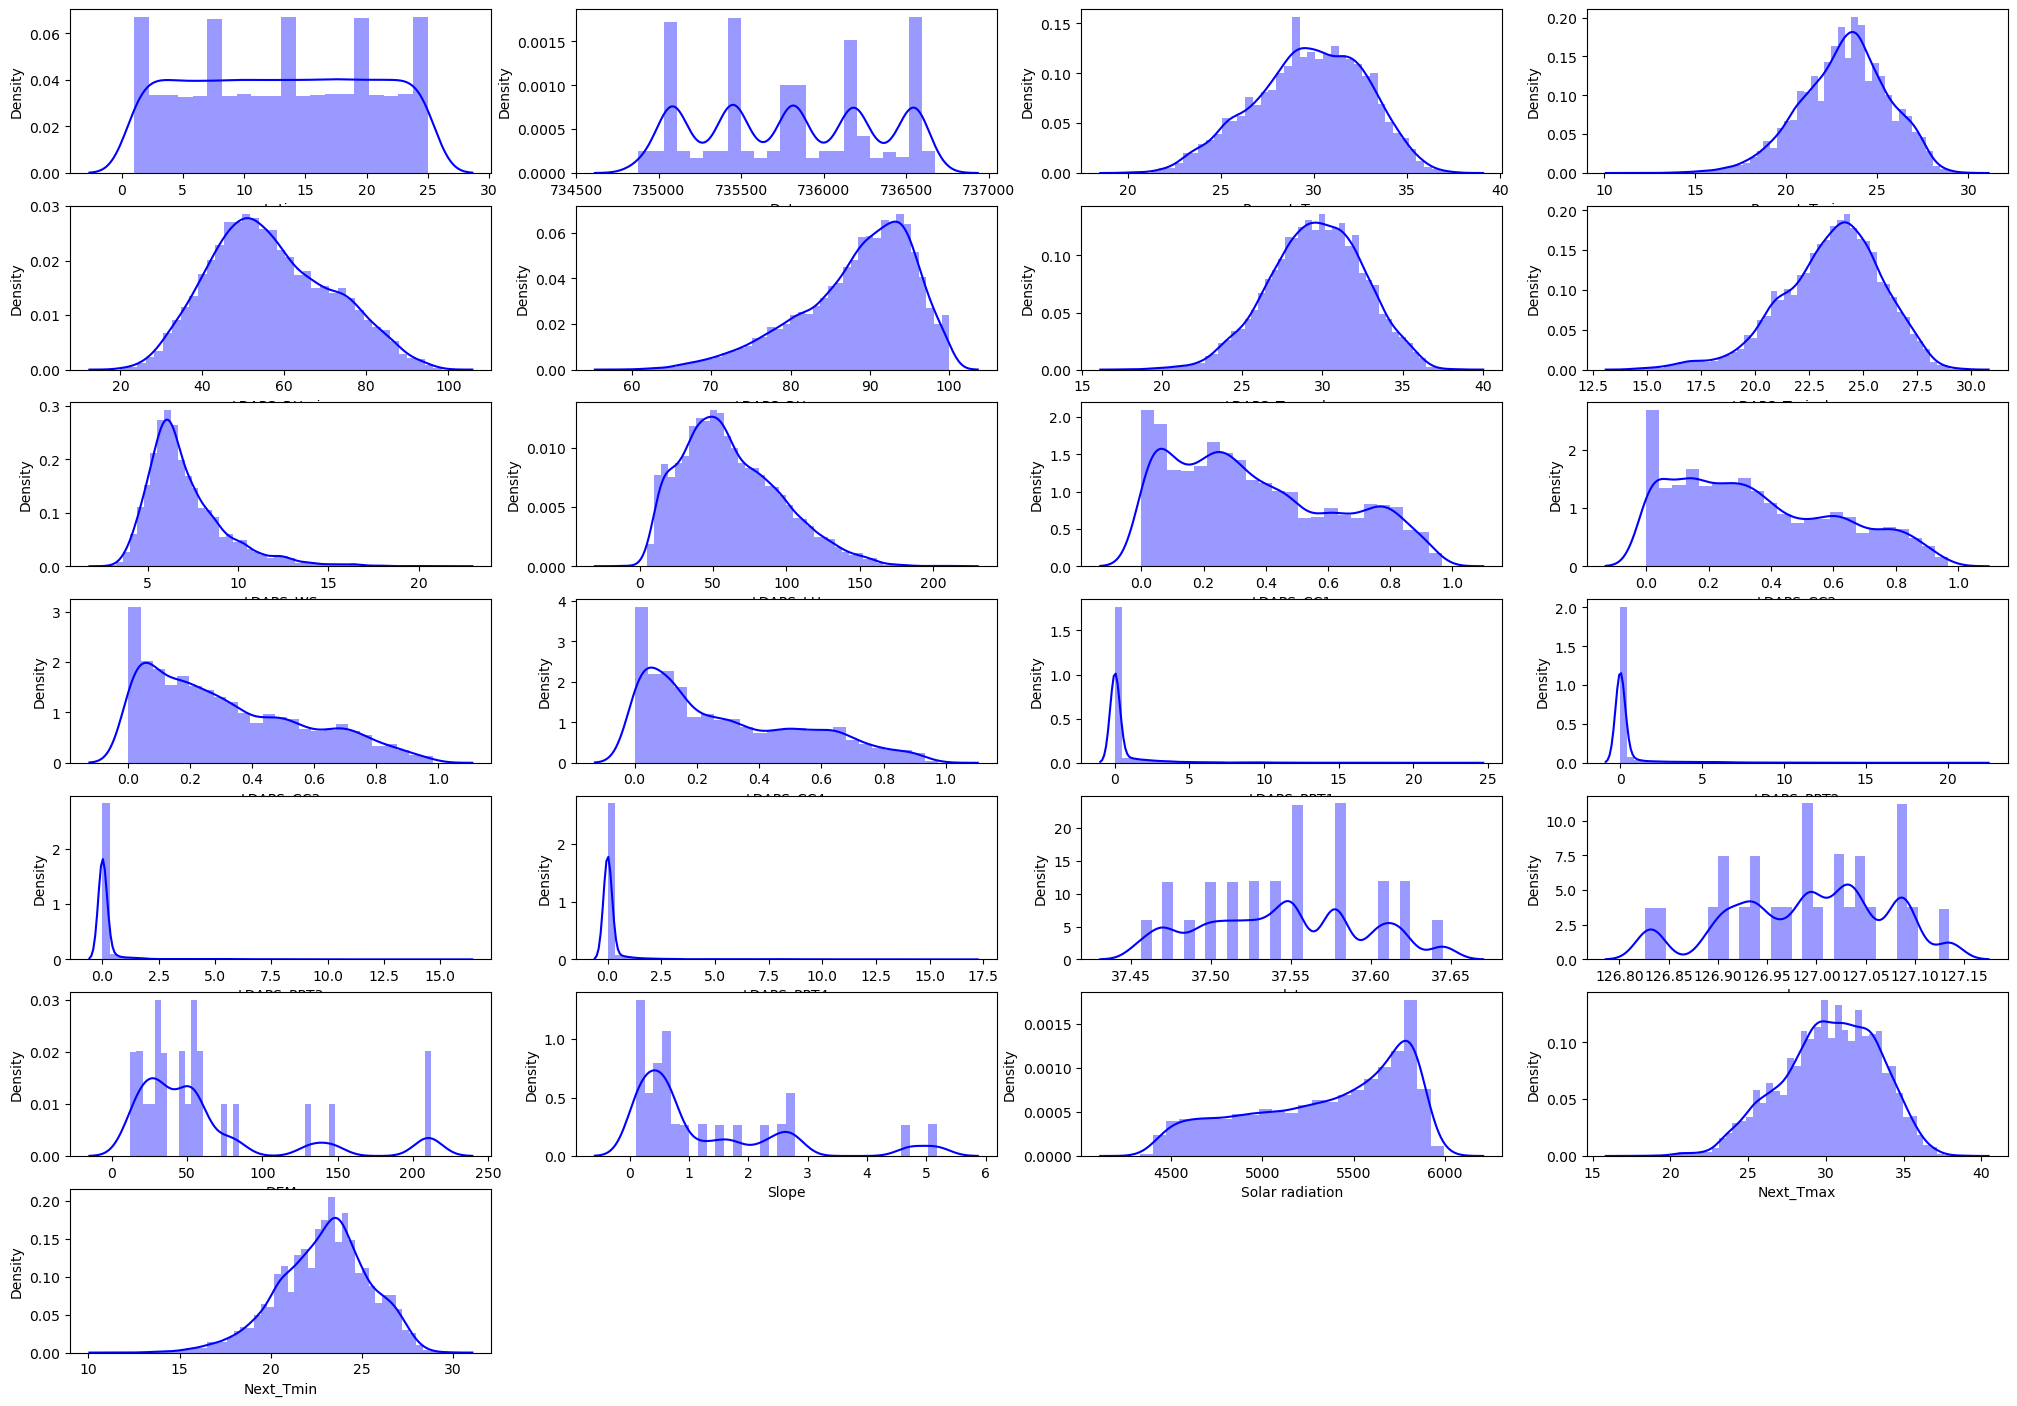

In [87]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [88]:
df.skew()

station            -0.004178
Date                0.011103
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

skewness more than+/- 0.5 will we treated

In [89]:
#Removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [90]:
df.skew()

station            -0.004178
Date                0.011103
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.085377
lon                -0.289048
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

Here skewness is removed

# Dividing data into X and Y

Saperating both varialbes into different parts

In [91]:
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]
x = df.drop(["Next_Tmax","Next_Tmin"], axis=1)

# Scaling X values

In [92]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [93]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [94]:
pd.DataFrame(x).describe()

0            1            2            3            4   \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.500588     0.512367     0.553884     0.639560     0.469075   
std       0.300744     0.289770     0.168602     0.129080     0.185781   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.250000     0.307350     0.443182     0.553763     0.332345   
50%       0.500000     0.518374     0.562500     0.650538     0.447460   
75%       0.750000     0.737194     0.681818     0.725806     0.601047   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   ...  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000  ...   
mean      0.534168     0.573457     0.466577     0.577269     0.716548  ...   
std       0.218452     0.140721     0.161898     0.140203     0.084114  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.372338     0.480406     0.355137     0.488723     0.657677  ...   
50%       0.545120     0.577731     0.469420     0.569439     0.712580  ...   
75%       0.697757     0.673421     0.576932     0.671920     0.776646  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

                13           14           15           16           17  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.438163     0.203769     0.180014     0.162167     0.142836   
std       0.297275     0.363625     0.345425     0.328030     0.319557   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.175506     0.000000     0.000000     0.000000     0.000000   
50%       0.417684     0.000000     0.000000     0.000000     0.000000   
75%       0.714454     0.177625     0.078306     0.052910     0.000131   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                18           19           20           21           22  
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000  
mean      0.469239     0.535340     0.519922     0.459103     0.503574  
std       0.267098     0.256375     0.261797     0.310769     0.267994  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.286017     0.359223     0.365938     0.168189     0.262740  
50%       0.500530     0.546926     0.541902     0.395934     0.527864  
75%       0.643008     0.699029     0.635218     0.738876     0.752227  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 23 columns]

data have been scalled

# MODEL BUILDING

# Linear Regression

In [95]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y1_train)
    predrf = LR.predict(x_test)
    score = r2_score(y1_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.7976251783237761  on Random_state  30


In [97]:
# spliting data 70% for train and 30% for test
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=maxRS)

In [98]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [100]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("===============================================================================")
    print('accuracy score of :', m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,x,y1,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is :  ",r2_score(y1_test,pred)-abs(score.mean()))
    print("===============================================================================")
    print("*******************************************************************************")

*******************************************************************************
accuracy score of : LinearRegression()
R2 Score:                 0.7976251783237761
Mean Absolute Error:      1.0808644109936136
Mean Squared error:       2.0180354448601996
Root Mean Squared Error:  1.4205757441474915
[0.60588151 0.68274129 0.62561494 0.65158867 0.72854201 0.72592021
 0.80404192 0.69175124]
cross validation score:   0.6895102242071867
Difference between R2 score and cross validatio score is :   0.10811495411658945
*******************************************************************************
*******************************************************************************
accuracy score of : RandomForestRegressor()
R2 Score:                 0.919140746977656
Mean Absolute Error:      0.6854198506807204
Mean Squared error:       0.8063099811155031
Root Mean Squared Error:  0.8979476494292432
[0.64697873 0.70029477 0.62062968 0.56977833 0.7307253  0.70698904
 0.78752077 0.68847667]
cross vali

# Hyper Parameter Tuning

Ridge for Next_Tmax

In [101]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y1_train)
clf.best_params_  #Best parameters

{'max_iter': 10, 'random_state': 17, 'solver': 'sag'}

In [102]:
clf_pred=clf.best_estimator_.predict(x_test)

In [103]:
r2_score(y1_test, clf_pred)

0.7970513065944721

Our model learnt almost 79.70% for Next_Tmax

# Saving the model

In [104]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmax.obj")
RF_from_joblib=joblib.load('Temperature_Tmax.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([31.67155187, 30.33711775, 32.02169213, ..., 29.73971695,
       28.5816335 , 31.87247059])

In [105]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y1_test[:]],index=["Predicted","Original"])

0          1          2          3          4         5     \
Predicted  31.671552  30.337118  32.021692  35.936111  33.060016  26.69978   
Original   36.100000  30.500000  35.100000  37.000000  33.900000  27.10000   

                6         7         8          9          10         11    \
Predicted  28.816311  31.54565  30.37958  28.325302  34.216395  32.931341   
Original   29.000000  30.20000  27.50000  25.500000  34.300000  34.500000   

                12         13         14         15         16         17    \
Predicted  28.043661  30.381984  35.553666  31.397805  34.915089  34.287976   
Original   25.200000  29.900000  35.100000  30.700000  34.400000  34.400000   

                18         19         20         21        22         23    \
Predicted  32.309546  27.509933  32.565411  26.285813  29.31885  29.915554   
Original   31.700000  27.900000  34.100000  24.600000  28.60000  29.700000   

               24         25         26         27         28         29    \
Predicted  29.02974  27.655138  32.390623  26.505077  34.753758  33.959352   
Original   28.70000  28.500000  33.300000  28.400000  32.900000  33.300000   

                30         31         32         33         34         35    \
Predicted  27.593333  33.373957  28.063194  31.017877  26.454405  31.412372   
Original   26.900000  32.500000  28.400000  30.000000  27.500000  30.100000   

                36         37        38         39         40         41    \
Predicted  29.678823  34.394889  26.20009  32.375726  24.623342  33.627781   
Original   30.600000  33.300000  29.30000  32.900000  24.700000  34.400000   

                42         43         44         45         46         47    \
Predicted  35.643803  28.650365  27.667426  32.039278  32.292198  30.996379   
Original   37.600000  28.200000  28.700000  30.000000  32.200000  33.300000   

                48         49         50         51         52         53    \
Predicted  34.747077  28.517698  30.363791  32.358205  24.164647  33.481791   
Original   34.800000  29.800000  30.500000  32.300000  23.200000  33.800000   

                54        55         56         57        58       59    \
Predicted  31.042921  34.74526  28.599524  30.569107  28.28816  32.5118   
Original   32.400000  34.60000  26.500000  30.300000  28.20000  33.4000   

                60         61         62         63         64         65    \
Predicted  27.049067  25.982767  33.931922  29.543636  30.395651  33.466141   
Original   26.500000  25.800000  34.400000  29.700000  27.500000  33.100000   

                66         67         68         69        70        71    \
Predicted  28.822854  30.457209  30.422787  30.646174  36.07547  27.45102   
Original   29.500000  31.400000  32.000000  34.100000  35.30000  30.50000   

                72         73         74         75         76         77    \
Predicted  24.027377  32.228933  32.529101  26.761994  30.275978  29.677383   
Original   23.900000  32.700000  31.200000  28.500000  28.300000  30.000000   

                78         79         80         81         82         83    \
Predicted  29.194128  30.626644  28.106808  28.501031  31.307496  30.071968   
Original   31.300000  32.200000  26.800000  30.000000  33.100000  32.000000   

                84         85         86         87        88         89    \
Predicted  28.629997  33.275028  34.644984  30.679525  33.20242  32.572368   
Original   26.600000  33.200000  34.600000  31.700000  32.50000  34.500000   

                90         91        92         93         94         95    \
Predicted  26.547381  24.000209  29.64663  32.014825  30.545294  34.928839   
Original   26.700000  23.200000  31.00000  33.500000  32.200000  35.900000   

                96         97         98         99         100        101   \
Predicted  31.428247  30.014953  31.204413  35.517515  30.743046  30.951086   
Original   32.200000  31.100000  30.200000  35.900000  33.200000  30.600000   

            

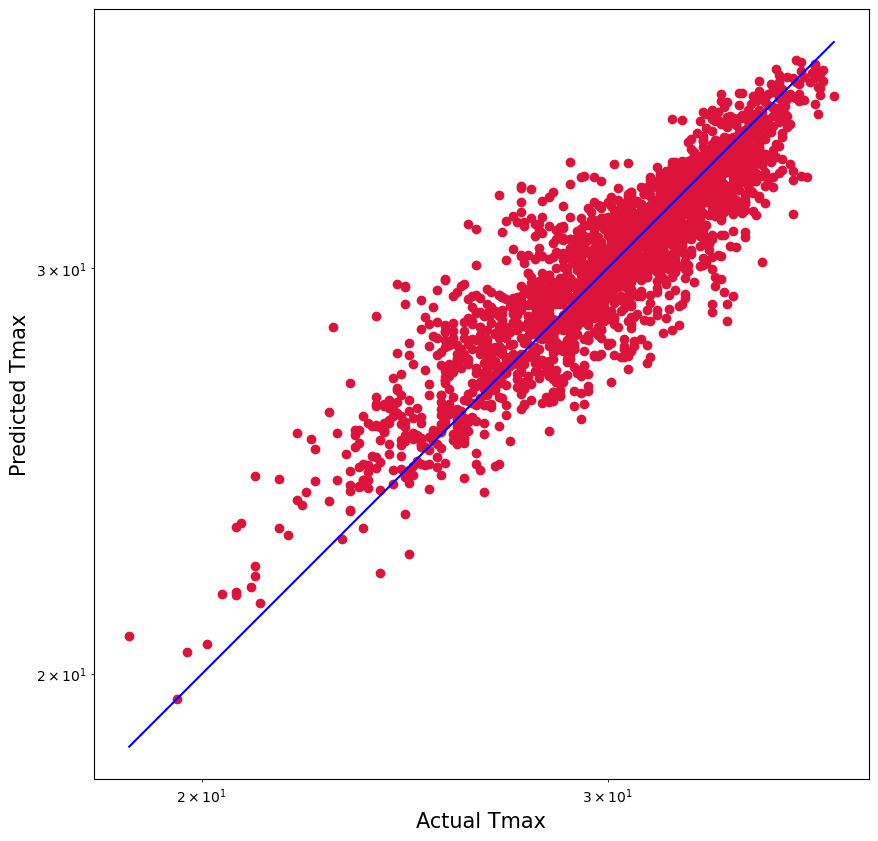

In [106]:
plt.figure(figsize=(10,10))
plt.scatter(y1_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y1_test))
p2 = min(min(Predicted), min(y1_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmax', fontsize=15)
plt.ylabel('Predicted Tmax', fontsize=15)
plt.axis('equal')
plt.show()

# With Next_Tmin

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8545379863374615  on Random_state  103


In [108]:
clf_pred=clf.best_estimator_.predict(x_test)

In [109]:
r2_score(y2_test, clf_pred)

-8.693244944113419

Our model learnt almost 69.32% for Next_Tmin

# Saving the model

In [110]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmin.obj")
RF_from_joblib=joblib.load('Temperature_Tmin.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([31.39268757, 28.47407468, 30.63715726, ..., 30.90018743,
       28.54037603, 29.99254195])

In [111]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y2_test[:]],index=["Predicted","Original"])

0          1          2          3          4         5     \
Predicted  31.392688  28.474075  30.637157  29.881378  28.172238  31.90349   
Original   24.300000  18.500000  24.300000  24.700000  19.400000  24.40000   

                6          7          8          9          10         11    \
Predicted  28.223033  30.356117  29.899472  29.060864  27.543934  31.551452   
Original   21.700000  21.400000  24.800000  22.300000  21.600000  26.100000   

                12         13         14         15         16         17    \
Predicted  31.405892  28.823177  26.133756  28.540985  27.418654  32.544072   
Original   23.800000  18.000000  22.000000  22.300000  22.800000  23.700000   

                18         19         20         21         22         23    \
Predicted  29.317755  28.798454  28.664943  31.096095  25.220067  24.124646   
Original   23.900000  18.100000  20.500000  21.500000  21.000000  20.600000   

                24         25         26         27         28         29    \
Predicted  30.155942  30.602303  32.603912  31.398343  32.279834  31.460239   
Original   25.400000  23.500000  25.800000  22.200000  27.200000  26.800000   

                30         31        32         33         34         35    \
Predicted  33.772125  31.716544  34.18699  27.548501  26.313903  32.855171   
Original   24.700000  20.500000  25.70000  23.500000  20.000000  22.000000   

               36         37         38         39         40         41    \
Predicted  30.73012  30.081082  24.816263  22.768875  27.996315  28.475602   
Original   26.10000  21.500000  19.600000  18.300000  13.300000  18.700000   

                42         43         44         45         46         47    \
Predicted  28.032357  26.538739  27.155439  30.360681  31.703991  31.362966   
Original   21.100000  21.800000  20.100000  21.800000  22.500000  24.000000   

                48         49         50         51         52         53    \
Predicted  31.118327  32.313856  27.409477  33.752451  25.062818  32.033569   
Original   23.300000  25.600000  22.200000  27.000000  20.400000  23.100000   

                54        55         56         57         58         59    \
Predicted  29.740096  27.16136  27.811904  28.520022  29.503375  28.368439   
Original   26.500000  23.70000  24.500000  24.000000  21.300000  20.900000   

                60         61         62         63         64         65    \
Predicted  25.471419  34.646734  28.411026  32.757406  32.401728  35.936111   
Original   20.500000  27.900000  19.800000  25.300000  24.800000  26.000000   

                66         67         68         69         70         71    \
Predicted  31.693774  35.026892  26.546209  31.881615  29.629368  28.553451   
Original   23.000000  25.800000  22.100000  26.200000  19.900000  19.900000   

                72         73         74         75         76         77    \
Predicted  33.481736  32.296153  31.483527  30.875142  32.899531  30.867398   
Original   23.100000  23.600000  22.900000  25.400000  26.000000  21.600000   

                78         79         80         81        82         83    \
Predicted  28.699125  30.879069  26.194841  31.445138  35.94445  31.918354   
Original   23.000000  21.900000  15.900000  22.600000  26.00000  23.500000   

               84         85         86         87         88         89    \
Predicted  35.32205  30.413581  31.434761  36.438394  28.306287  28.645783   
Original   24.10000  22.800000  22.100000  26.500000  24.000000  19.200000   

                90         91         92         93        94         95    \
Predicted  30.908325  30.887113  25.099594  30.743068  32.90261  35.793543   
Original   22.000000  23.700000  18.200000  26.000000  23.90000  26.600000   

                96         97         98         99         100        101   \
Predicted  31.025045  30.220091  32.656564  36.553548  27.728549  24.920387   
Original   25.500000  22.100000  23.900000  27.200000  23.800000  19.60

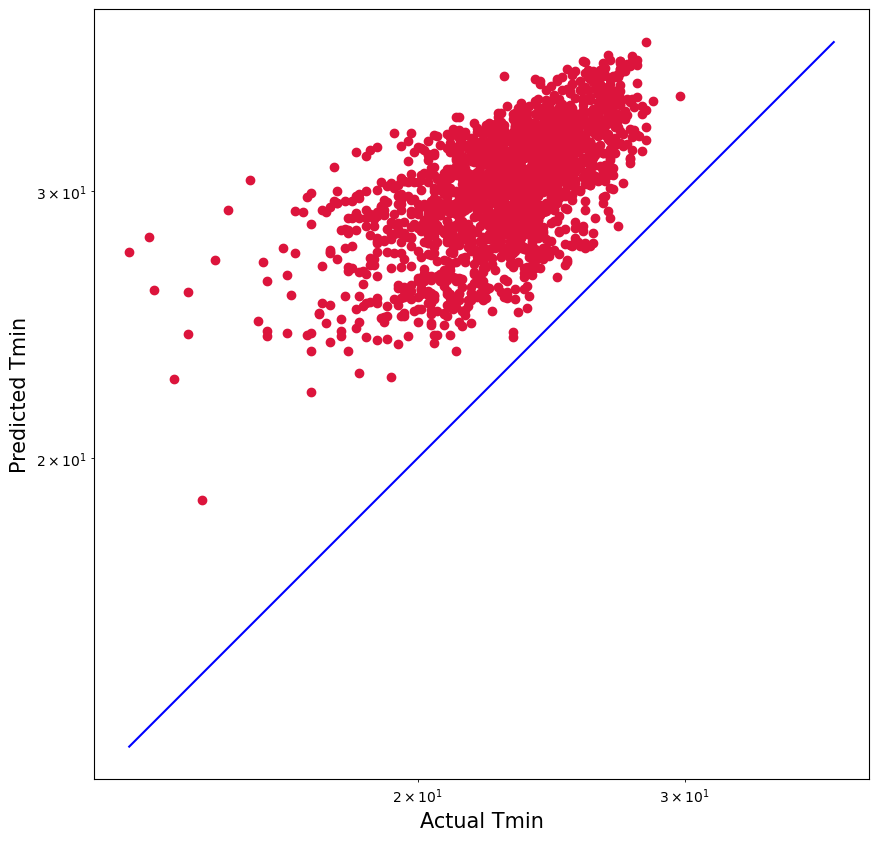

In [112]:
plt.figure(figsize=(10,10))
plt.scatter(y2_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y2_test))
p2 = min(min(Predicted), min(y2_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmin', fontsize=15)
plt.ylabel('Predicted Tmin', fontsize=15)
plt.axis('equal')
plt.show()

# Thankyou